# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Brandt Green

EID: bwg537

Name: Bret Jaco

EID: bcj646

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd


class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum

        # For momentum:
        self.previous_velocity: np.array = np.zeros(num_of_coefs) # value starts at 0, but is continually updated in SGD momentum training

        # for rmsprops
        self.moving_average_gradient_square:np.array = np.zeros(num_of_coefs)

    def rmsprop(self, gradient):
        '''updates self.coef based on gradient using rmsprop'''
        new_moving_average_gradient_squared = self.mu * self.moving_average_gradient_square + (1- self.mu) * (np.power(gradient,2))
        self.coef = self.coef - self.learning_rate/(np.sqrt(new_moving_average_gradient_squared))*gradient # Update coefs
        self.moving_average_gradient_square = new_moving_average_gradient_squared # update moving average for next iteration


    def sgd_momentum(self, gradient):
        '''updates self.coef based on gradient using Sgd_momentum'''
        new_velocity = self.gama * self.previous_velocity + self.learning_rate * gradient
        self.previous_velocity = new_velocity # Update the velocity for the next round
        self.coef = self.coef - new_velocity

    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        ''' Fit model based on update rule'''

        mse = []
        coefs = []    
        X = self.get_features(X) # Get transformed X values

        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]): # Loop through all of the data points
                x_vals = X[i,:] # Get the transformed x values associated with sample
                y_val = y[i] # Get the y value
    
                # Compute residual
                residual = self.linearPredict(x_vals) - y_val
                # Compute gradient
                gradient = x_vals * residual + self.regularization * self.coef

                # Update weights base on the provided rule
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                elif update_rule == 'rms_prop':
                    self.rmsprop(gradient)
                else:
                    return print(f"Uh-oh, you've entered a bad arguement for fit: '{update_rule}' is not valid. ")


            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)  
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]

        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.title(f'MSE by epoch for learning rate: {self.learning_rate} and Regularization: {self.regularization}\nMethod: {update_rule}')

            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            plt.title(f'Coefficients by epoch for learning rate: {self.learning_rate} and Regularization: {self.regularization}\nMethod: {update_rule}')

    

    def get_features(self, X):
       """Transform the input data matrix to match the specified equation given in problem formulation. """
       x = np.zeros((X.shape[0], num_of_coefs))
       x[:,0] = 1
       x[:,1] = X[:,0]
       x[:,2] = X[:,0]*X[:,1]
       x[:,3] = (X[:,0]**2)*X[:,1]
       x[:,4] = X[:,0] * (X[:,1]**2)
       x[:,5] = X[:,1]**3
       
       return x
        
    def linearPredict(self, X_features):
        """returns a vector of y_hat predictions given a matrix of x_values"""
        return np.dot(X_features, self.coef)   



<ipython-input-8-888b1a32e1a1>:69: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-8-888b1a32e1a1>:56: RuntimeWarning: overflow encountered in multiply
  gradient = x_vals * residual + self.regularization * self.coef
<ipython-input-8-888b1a32e1a1>:56: RuntimeWarning: invalid value encountered in multiply
  gradient = x_vals * residual + self.regularization * self.coef
<ipython-input-8-888b1a32e1a1>:36: RuntimeWarning: invalid value encountered in add
  new_velocity = self.gama * self.previous_velocity + self.learning_rate * gradient


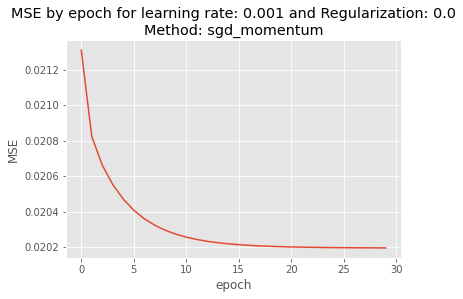

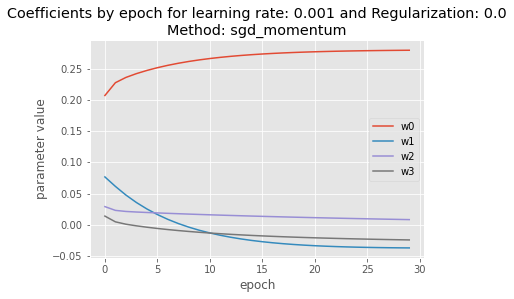

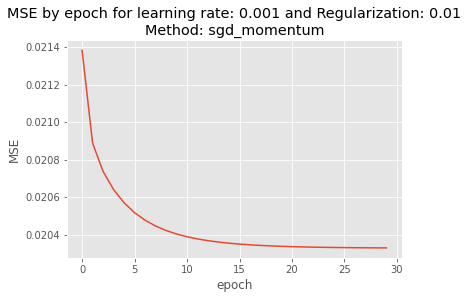

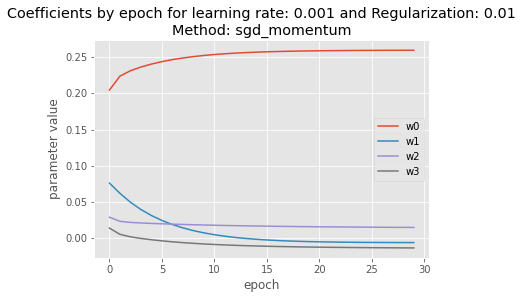

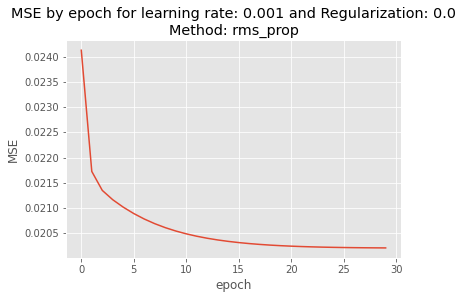

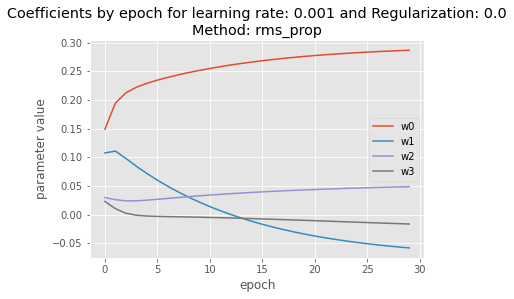

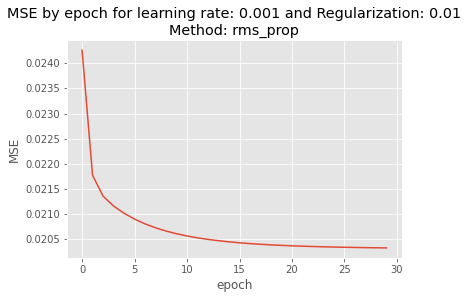

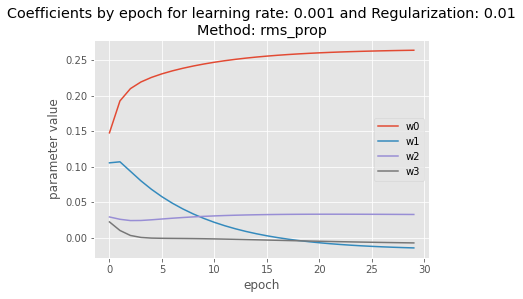

In [9]:
# Set Paramters and read in data
data = pd.read_csv('SGD_samples.csv') 
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rates = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]
num_of_coefs = 6


# Create empty dataframes which will be used to keep track of the mse's for each model.
mse_df_momentum = pd.DataFrame(data=np.zeros((len(learning_rates),len(regularization))), index=learning_rates,columns=regularization)
mse_df_rmsprop = pd.DataFrame(data=np.zeros((len(learning_rates),len(regularization))), index=learning_rates,columns=regularization)

for learning_rate in learning_rates:
    for alpha in regularization:
        
        # Fit momentum model with parameters and add the mse to the df
        model_momentum = LinearRegression(learning_rate, alpha, n_epochs)
        model_momentum.fit(X,y,update_rule='sgd_momentum')
        mse_df_momentum.loc[learning_rate, alpha] = model_momentum.lowest_mse


        # Fit rmsprop model with parameters and add the mse to the df
        model_rmsprop = LinearRegression(learning_rate, alpha, n_epochs)
        model_rmsprop.fit(X,y,update_rule='rms_prop')
        mse_df_rmsprop.loc[learning_rate, alpha] = model_rmsprop.lowest_mse


# Below line first unstacks the data and then sorts all the mses in our dataframe.
# And the multi-indexed-dataframe will have the parameters where learning rate is first elemement and alpha is second of the indexes
top_momentum_param_combos = mse_df_momentum.stack().sort_values()
for best_param_tuple in top_momentum_param_combos[:2].index:
    learning_rate = best_param_tuple[0]
    alpha = best_param_tuple[1]
    model_momentum = LinearRegression(learning_rate, alpha, n_epochs)
    model_momentum.fit(X,y,update_rule='sgd_momentum',plot=True)

# Same as above basically
top_msprop_param_combos = mse_df_rmsprop.stack().sort_values() 
for best_param_tuple in top_msprop_param_combos[:2].index:
    learning_rate = best_param_tuple[0]
    alpha = best_param_tuple[1]
    model_momentum = LinearRegression(learning_rate, alpha, n_epochs)
    model_momentum.fit(X,y,update_rule='rms_prop',plot=True)



In [10]:
print(f"""When using SGD momentum the best mse was: {top_momentum_param_combos.iloc[0]} where the learning rate was {top_momentum_param_combos.index[0][0]} and the regularization constant was {top_momentum_param_combos.index[0][1]}""")
print(f"""When using SGD momentum the second best mse was: {top_momentum_param_combos.iloc[1]} where the learning rate was {top_momentum_param_combos.index[1][0]} and the regularization constant was {top_momentum_param_combos.index[1][1]}""")
print('')

print(f"""When using RMSprop the best mse was: {top_msprop_param_combos.iloc[0]} where the learning rate was {top_msprop_param_combos.index[0][0]} and the regularization constant was {top_momentum_param_combos.index[0][1]}""")
print(f"""When using RMSprop the best mse was: {top_msprop_param_combos.iloc[1]} where the learning rate was {top_msprop_param_combos.index[1][0]} and the regularization constant was {top_momentum_param_combos.index[1][1]}""")


When using SGD momentum the best mse was: 0.020195535187159188 where the learning rate was 0.001 and the regularization constant was 0.0
When using SGD momentum the second best mse was: 0.020329348110272264 where the learning rate was 0.001 and the regularization constant was 0.01

When using RMSprop the best mse was: 0.020202367797558143 where the learning rate was 0.001 and the regularization constant was 0.0
When using RMSprop the best mse was: 0.020331512699591485 where the learning rate was 0.001 and the regularization constant was 0.01


The performance of both models appears to be nearly identical when evaluating the different methods based off of the best two MSEs for each. Looking at the charts, it is still difficult to discern any real difference in the two methods. It appears that RMSprop may have a slight advantage in that it appears that the MSE decreases a bit quicker than the SGD momentum and possibly reaches the plateau point in fewer epochs.

# Answer:

#Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

### A) 

Losses |Tanh |Linear
-----|-----|----- 
Train|0.193|0.510
Test|0.205|0.490

The Linear Activation function doesn't look like it's doing so great. It seems like the linear functions try to split the classification right down the middle, but for the tanh function, each neruon focuses on correctly subclassing a smaller portion of the data, which when aggregated is more effective.

### B) 

Losses |4-Neurons |8-Neurons
-----|-----|----- 
Train|0.045|0.008
Test|0.055|0.013

It looks to us like the boundaries are quite similar. There is a bit  more curvature in the model with 8-neurons which we believe occurs because the additional neurons allow the model to catch some of the more nuanced aspects of the data. We think the reason the decision boundaries look so similar is because the data appears to be segmented into 4 primary locations, so it makes sense that the majority of the data can be correctly classified with only 4 neurons and that each additional neuron after that is only working to refine the edges a bit.

### C)

#### Epocs: 100
Losses | Learn-Rate: 10 | Learn-Rate: 1| Learn-Rate: 0.1 | Learn-Rate: .01 | Learn-Rate: .001
-----|-----|----- |----- |----- |----- 
Train|0.573|0.000|0.012|0.064|0.379|
Test|0.528|0.001|0.011|0.052|0.368|

#### Epocs: 1000
Losses | Learn-Rate: 10 | Learn-Rate: 1| Learn-Rate: 0.1 | Learn-Rate: .01 | Learn-Rate: .001
-----|-----|----- |----- |----- |----- 
Train|0.800|0.000|0.001|0.012|0.153|
Test|0.968|0.000|0.003|0.010|0.144|

In general, increasing the Epocs will increase the performance of the model because more runs through the data gives the NN more time to learn the optimal parameters. It is interesting to note that this affect occurs most strongly for the lowest learning rates. This makes sense because with the high learning rate, you are likely to get stuck in a local minimum early on due to chance, but with the smallest learning rates, the additional time/data yields better and better results.

The change in learning rate also has interesting conclusions. It appears that the best results arrive from a learning rate of 1. For both epoch cases, the error is highest with a learning rate of 10, decreases sharply to its lowest value at a learning rate of 1 and then appears to creep upward for lower and lower learning rates. We might expect that if we continued to train the model with larger epochs that eventually the lower learning rates would catch up to the learning rate of 1.


### D) 
#### Training Loss: 0.002
#### Test Loss: 0.002

We found a few interesting things. First, if you only include one of the features - $X_1$ for example- then it does not matter how complicated you make the model or how much adjusting you do, it always performs horribly. This is a good reminder that having the appropriate data and using the correct feature space is extremely important. Following off of that insight, we decided to use only one input feautre that seemed most relevant: $X_1X_2$. Using this input feature, the model is able to achieve near perfect accuracy almost instanteously, and only using one neuron of one hidden layer! This reiterates to us how important it is that you intelligently setup the model or problem before diving into the weeds.

![Playground](playground_screenshot.png)

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [11]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [12]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train
clf.fit(X_train)


MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [13]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

evaluate_print(clf,y_test,y_test_scores)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


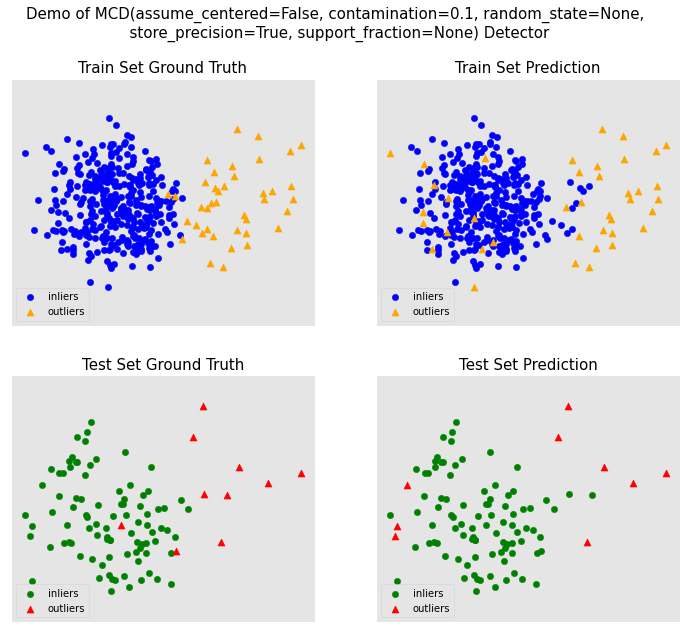

In [14]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
y_train_pred = clf.predict(X_train)
visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test,y_train_pred,y_test_pred);

In [15]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

cblof = CBLOF()

cblof.fit(X_train)
ytrain_pred_cblof = cblof.predict(X_train)
ytest_pred_cblof = cblof.predict(X_test)
y_scores_cblof = cblof.decision_function(X_test)

evaluate_print(cblof,y_test,y_scores_cblof)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9044, precision @ rank n:0.7


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


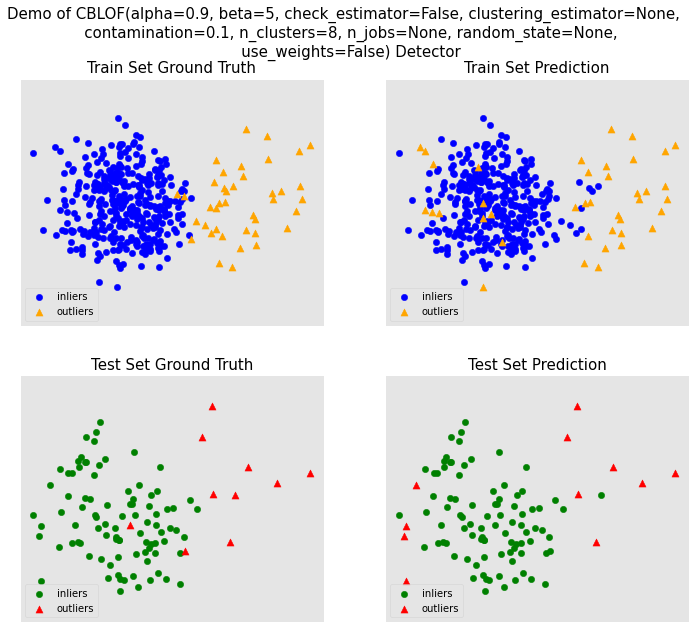

In [16]:
visualize(cblof, train_principalComponents, y_train, test_principalComponents, y_test,ytrain_pred_cblof,ytest_pred_cblof)

In [17]:
copod = COPOD()
copod.fit(X_train)
ytrain_pred_copod = copod.predict(X_train)
ytest_pred_copod = copod.predict(X_test)
y_scores_copod = copod.decision_function(X_test)

evaluate_print(copod,y_test,y_scores_copod)


COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


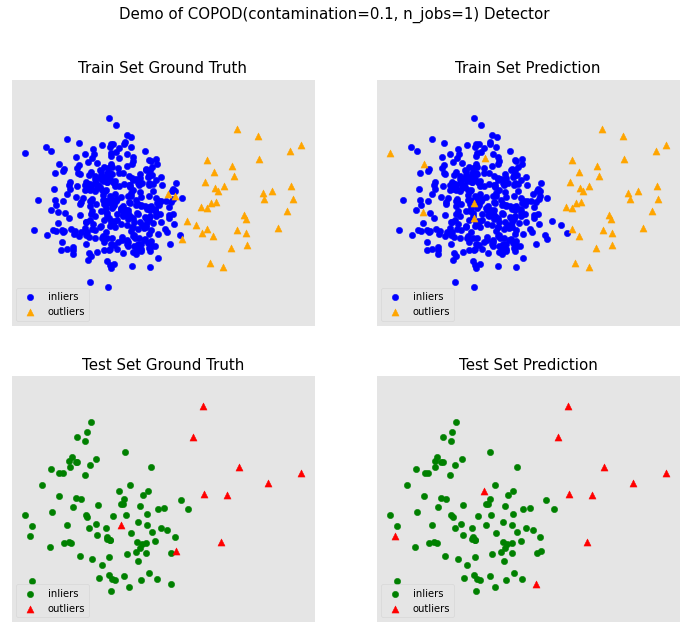

In [18]:
visualize(copod, train_principalComponents, y_train, test_principalComponents, y_test,ytrain_pred_copod,ytest_pred_copod)

The three models progressively improved with the MCD model reporting an ROC of 0.8689 with precision of 0.6, the CBLOF model reporting an ROC of 0.8844 with precision of 0.7, and the COPOD model yielding an ROC of 0.9556 with precision of 0.8. After using principal component analysis to reduce the features of the X values, we were able to visualize the train and test predictions for the various models.  While the COPOD model did provide the best prediction accuracy, the visualizations show that the models made similar errors. Both the MCD and CBLOF models treated three data points on the far left as outliers along with the true outliers on the right side. The COPOD model was able to reduce those incorrect left classifications to one while also increasing accuracy on the right side.

#Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

The principles in PCA are the the variables that are constructed as linear combinations of the original variables where each principle is uncorrelated to the rest. These new variables are constructed in a way so that maximum variation in the data is retained. 

Relating this to optimization: finding the linear combination of the orginal data set that maximizes the variation of the data is equivalent to fitting a line that minimzes the sum of squared residuals.  

The eignevectors of the covariance matrix are the directions where there is the most variance. 



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [19]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


Below, the columns with NaN values are printed along with the number of NaN values in those columns.

In [20]:
nan_data_cols = data.isna().sum()
nan_data_cols[nan_data_cols>0]

LotFrontage     259
Alley          1369
MasVnrArea        8
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [21]:
data_dm = data.copy()

bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True

data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'],bins=bins,labels=labels,include_lowest=include_lowest)


c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [22]:
total_rows = data_dm.shape[0]
column_null_percent = data_dm.isnull().sum()/total_rows
cols_to_delete = list(column_null_percent[column_null_percent>.65].index)

data_dm = data_dm.drop(columns=cols_to_delete)
# data = data.drop(columns=cols_to_delete) # Not sure if we were supposed to drop the values here too?


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [23]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
sample_ages

#Sample mean
print(f'The sample mean = {sample_ages.mean()}')

#Population mean
print(f"The population mean = {data['SalePrice'].mean()}")

The sample mean = 178292.63125
The population mean = 180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [24]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)

sample_mean = sample.mean()

#Get the critical Z value
z_critical = -1*stats.norm.ppf(.025)

#Get population standard deviation
pop_stdev = np.std(data_dm['SalePrice'])

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print(f"""Sample mean = {sample_mean:,.2f} with a 95% confidence interval of LB: {confidence_interval[0]:,.2f} and UB {confidence_interval[1]:,.2f}""")

Sample mean = 182,092.53 with a 95% confidence interval of LB: 166,527.42 and UB 197,657.64


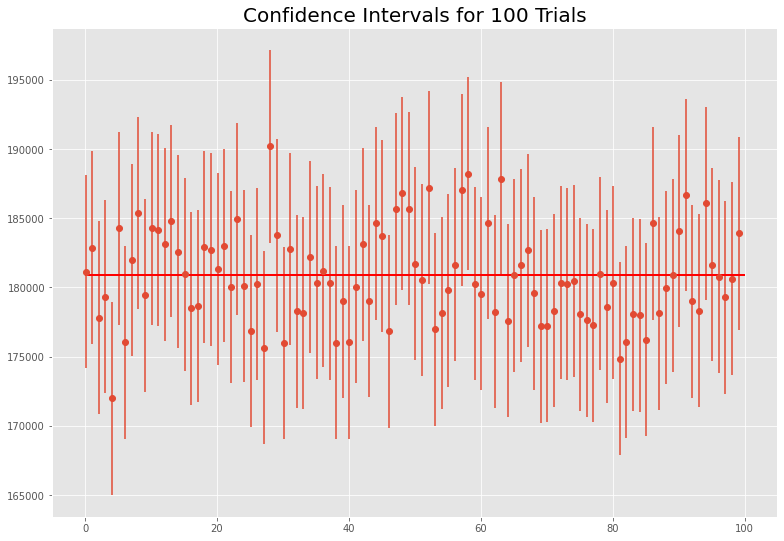

In [25]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    # compute z critical value
    z_critical = -1 * stats.norm.ppf(.025)

    # compute population standard deviation     
    pop_stdev = np.std(data_dm['SalePrice'])
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

We interpret the above 95% confidence intervals as saying that if we repeatedly draw samples of size 500, calculate the mean and the confidence interval based on the sample standard deviation  and sample mean, then we would expect that about 95% of these intervals will capture the true population mean. In the above chart, this does appear to be the case: the vast majority of the intervals capture the true population mean indicated by the horizontal red line, but there are at least 2 of the intervals that do not.